In [54]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [55]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [56]:
def name_node(n):
    name = ''
    while True:
        n -= 1;
        name = chr(ord('A') + n%26) + name;
        n = n // 26
        if n < 0:
            break
        
    return name[1:]

# Graph Helper Functions

In [57]:
from itertools import chain, takewhile
from operator import itemgetter
from networkx import community

def weights(G):
    return {(u,v):d['weights'] for u,v,d in G.edges(data=True)}

def lightest_edge(G):
    u, v, w = min(G.edges(data='weights'), key=itemgetter(2))
    return (u, v)

def heaviest_edge(G):
    u, v, w = max(G.edges(data='weights'), key=itemgetter(2))
    return (u, v)

def median_edge(G):
    u, v, w = sorted(G.edges(data='weights'), key=itemgetter(2))[len(G.edges)//2]
    return (u, v)

def draw_graph(G, pos, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    nx.draw(G, pos=pos, with_labels=True, ax=ax)
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=weights(G));  

# Instant Insanity Helper Functions

In [58]:
def generate_graph_ii(puzzle):
    G = nx.Graph()    
    # create nodes
    node_list = list(puzzle.keys())
    G.add_nodes_from(node_list)
    
    # create edge if the nodes share colors
    append = lambda a,b: a.append(b)
    a = dict(starmap(lambda a,b: (node_list[a], dict(Counter(chain(*b)))), enumerate(puzzle.values())))
    for b, data in pd.DataFrame(a).T.iteritems():
        nodes = data.iloc[np.where(~data.isna())].index.to_list()
        edges = [edge for edge in product(nodes, nodes) if edge[0] < edge[1]]
        weights = [data.iloc[np.where(data.index.isin((a, b)))].sum() for a, b in edges]
        G.add_edges_from(edges, weights=sum(weights))
        
    return G

def puzzle_from_seed_ii(seed, n):
    group = lambda l, n: (tuple(l[j:j+n]) for j in range(0, len(l), n))
    generate_colors = lambda i: 1+(np.floor(i*seed)%n)
    colors = group(list(group(list(map(generate_colors, range(1, 6*n+1))), 2)), 3)
    cubes = map(name_node, range(1, n+1))
    return dict(zip(cubes, colors))

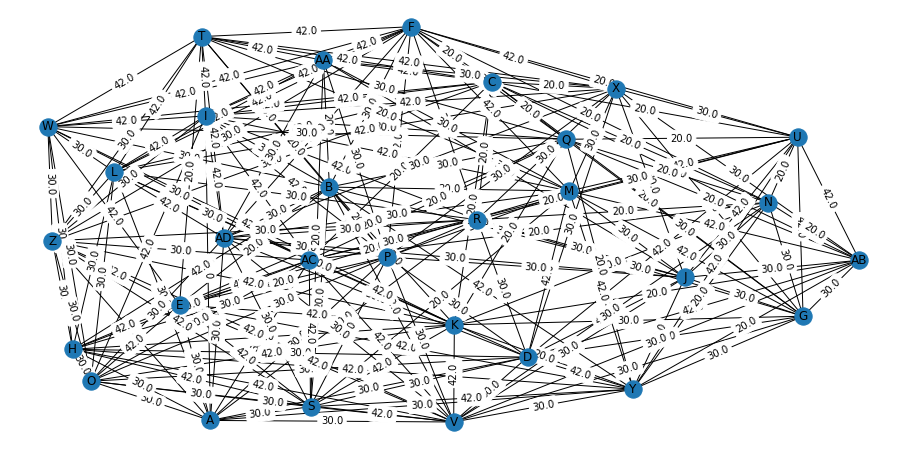

In [61]:
II = puzzle_from_seed_ii(np.pi, 30)
G = generate_graph_ii(II)

fig, ax = plt.subplots(figsize=(16, 8))
pos = nx.nx_agraph.graphviz_layout(G, prog='neato')
draw_graph(G, pos, ax=ax)

# Triangle Version Helper Functions

In [66]:
import numpy as np
from collections import Counter
from itertools import chain, starmap, product
from operator import add
import pandas as pd

def generate_graph(puzzle):
    G = nx.Graph()
    #node_list = list(map(name_node, range(1, len(puzzle)+1)))
    # create nodes
    G.add_nodes_from(puzzle.keys())
    
    d = dict(zip(puzzle.keys(), map(lambda i: dict(Counter(i)), puzzle.values())))
    for b, data in pd.DataFrame(d).T.iteritems():
        nodes = data.iloc[np.where(~data.isna())].index.to_list()
        edges = [edge for edge in product(nodes, nodes) if edge[0] < edge[1]]
        weights = [data.iloc[np.where(data.index.isin((a, b)))].sum() for a, b in edges]
        G.add_edges_from(edges, weights=sum(weights))
        #print(nodes, weights, data)

    return G

def puzzle_from_seed(seed, n):
    group = lambda l, n: (tuple(l[j:j+n]) for j in range(0, len(l), n))
    generate_colors = lambda i: 1+(np.floor(i*seed)%n)
    colors = group(list(map(generate_colors, range(1, 3*n+1))), 3)
    cubes = map(name_node, range(1, n+1))
    return dict(zip(cubes, colors))

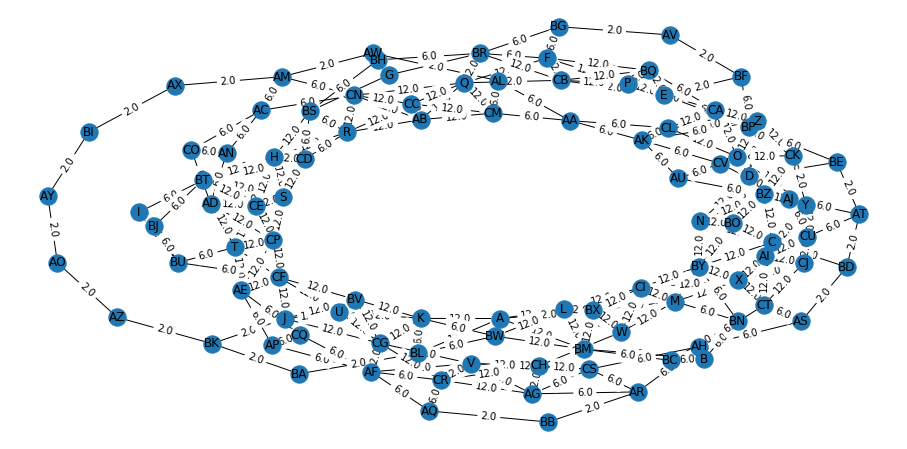

In [67]:
TT = puzzle_from_seed(np.pi, 100)
G = generate_graph(TT)

fig, ax = plt.subplots(figsize=(16, 8))
pos = nx.nx_agraph.graphviz_layout(G, prog='neato')
draw_graph(G, pos, ax=ax)

# Solver

In [27]:
draw_graph(G, pos)
    
comp = community.girvan_newman(G, most_valuable_edge=lightest_edge)

for i in takewhile(lambda A: len(A) < 25, comp)#len(list(chain(*A))), comp):
    _, ax = plt.subplots()
    for g in [G.subgraph(p) for p in i]:
        draw_graph(g, pos, ax=ax)

SyntaxError: invalid syntax (<ipython-input-27-089e94833486>, line 5)